In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 1) First Class, how to read a data file into pandas?

In [14]:
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [20]:
use_cols = ['user_ic','age','gender','occupation','zip_code']
users = pd.read_table('http://bit.ly/movieusers',sep = '|', header = None, names = use_cols)
users.head()

,user_ic,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# 2) Class two, how to select a pandas series from a DataFrame?

In [22]:
ufo = pd.read_csv("http://bit.ly/uforeports")

In [23]:
type(ufo) #This shows us the type of object that is the file ufo. As we expected, it's a DataFrame type. 

pandas.core.frame.DataFrame

In [24]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [27]:
ufo['City']; #We select a serie by using bracket notation. 
type(ufo['City']) # With type() we check that the type of object we select is a serie, indeed.

pandas.core.series.Series

In [30]:
ufo.City; # We can select a serie by using dot notation as well. 
type(ufo.City)

pandas.core.series.Series

In [38]:
# How to create a new serie from the original DataFrame? We use the same technique as strings, we use plus sign.
ufo.City+ufo.State; # This put the City just next to the Sate, and this is not helfpul at all. We can fix it.
ufo['City']+ufo['State']; # This produces the same result.

In [40]:
ufo.City+', '+ufo.State; #By adding a comma between the series, we orgnize the serie in a better way.
ufo['City']+', '+ufo['State']; # This produces the same resulting serie as the previous line.

In [35]:
# If we want to create a new column with the previous serie, the resulting of adding two series, 
# We have to use bracket notation.
ufo['Location'] = ufo.City+', '+ufo.State

In [36]:
ufo.head() # We can see here the last column added is a combination of two series, Location.

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


# 3) Third class, why some commands end with parenthesis, and others don't?

In [2]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [3]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [4]:
movies.describe() #Describes shows you a description of the statistics of all numerical columns. 

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [5]:
movies.shape

(979, 6)

In [6]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

**The resons for which some expressions have parenthesis and others don't are that the DataFrame type has methods
and attributes. The methods are like actions, tasks made by the Data Frame. For instance, df.head() means "please, return the head", and df.describe() means "please, compute the statistics". Now, the attributes are characteristics of the Data Frame. For instance, df.shape means "characteristic of shape is:", the same idea with df.dtype.**

In [7]:
movies.describe(include='object')

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,True Grit,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


# Cheking arguments of a method.
If you want to review the arguments of a method, you have to hit shift+tab.
* one time and it shows a brief list with the arguments or parameters.
* twice and it shows a bigger window with more information.
* three times and the window satays longer.
* four times and the window gets bigger and it covers half of the browser. 

#  4) Fourth classe, How to rename the columns of a Data Frame?

In [30]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [31]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [11]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

**Let's suppose that we want to rename the column "Shape Reported" and "Colors Reported", how do i do that?**

In [14]:
ufo.rename(columns = {'Colors Reported':'Colors_Reported','Shape Reported':'Shape_Reported'},inplace=True)

If we want to rename a column we have to use the .rename() method, we pass the parameters as columns = {'old name':'new name'}
and the parameter inplace = True, so we make the change very there. 

In [15]:
ufo.columns #Notice that the names of two columns changed. 

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

**Is there another way of renaming the columns of a Data Frame? What if I want to replace all these column names?**
* Create a list with new column names, for instance, new_cols=['name1','name2','name3','name4','name5']
* Then we just pass the list of names to the attribute df.columns = new_cols.
* This overwrite the name of the columns automatially. 

In [17]:
new_name_cols = ['city','colors reported','shape reported','state','time']

In [18]:
ufo.columns = new_name_cols

In [20]:
ufo.columns # Notice that now all the name columns are written in lower case. 

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

**Is there another way? Yes, there's a third way of renaming the columns.**
* We just pass the list of the new names as argument of the pd...read_csv() method. 

In [32]:
spanish_cols = ['ciudad','color reportado','forma reportada','provincia','hora']
ufo = pd.read_csv('http://bit.ly/uforeports',names = spanish_cols, header=0)

In [33]:
ufo.head()

,ciudad,color reportado,forma reportada,provincia,hora
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


# What happens if I have hundreds of columns and I want the spaces with underscores?

We can use a string method for the attribute columns.

In [34]:
ufo.columns = ufo.columns.str.replace(' ','_')

In [35]:
ufo.head()

,ciudad,color_reportado,forma_reportada,provincia,hora
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


# 5) Fifth class, how to remove columns?

In [40]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [41]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [42]:
ufo.drop('Colors Reported',axis=1, inplace=True) #this is only for just one column. 

In [43]:
ufo.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


In [44]:
ufo.drop(['City','State'],axis=1,inplace=True)

In [45]:
ufo.head()

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00


In [53]:
ufo.drop([1,2,3,4,5],axis=0,inplace=True)

In [54]:
ufo.head()

,Shape Reported,Time
6,CIRCLE,6/15/1935 0:00
7,DISK,7/15/1936 0:00
8,CIGAR,10/15/1936 17:00
9,CYLINDER,6/15/1937 0:00
10,LIGHT,8/15/1937 21:00


# 6) Sixth class, How do I sort a DataFrame or a Series?

In [3]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [5]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [4]:
movies.title.sort_values().head()

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
Name: title, dtype: object

In [7]:
 movies.sort_values('star_rating',ascending = False).head(8)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."


In [8]:
movies.sort_values(['star_rating','duration']).head(8)

,star_rating,title,content_rating,genre,duration,actors_list
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
948,7.4,Frances Ha,R,Comedy,86,"[u'Greta Gerwig', u'Mickey Sumner', u'Adam Dri..."
966,7.4,The Simpsons Movie,PG-13,Animation,87,"[u'Dan Castellaneta', u'Julie Kavner', u'Nancy..."
947,7.4,Eraserhead,UNRATED,Drama,89,"[u'Jack Nance', u'Charlotte Stewart', u'Allen ..."
971,7.4,Death at a Funeral,R,Comedy,90,"[u'Matthew Macfadyen', u'Peter Dinklage', u'Ew..."
933,7.4,Beetlejuice,PG,Comedy,92,"[u'Alec Baldwin', u'Geena Davis', u'Michael Ke..."
942,7.4,Raising Arizona,PG-13,Comedy,94,"[u'Nicolas Cage', u'Holly Hunter', u'Trey Wils..."
959,7.4,Deconstructing Harry,R,Comedy,96,"[u'Woody Allen', u'Judy Davis', u'Julia Louis-..."


# 7) How do I filter rows of a DataFrame by column value?

In [10]:
movies = pd.read_csv('http://bit.ly/imdbratings') #Dataset of top rated movies. 

In [11]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [12]:
movies.shape

(979, 6)

**Let's pretend that we want to only examine movies that are really long, maybe ones that are at least 200 minutes long. In other words, we want to filter this DataFrame, so that we see all the columns, but we only see the rows in which that row has a duration of at least 200 minutes.**

In [13]:
two_hundred_minutes = movies['duration'] >= 200 #We set a boolean serie in which the value is True when the duration is greater than 200.

In [14]:
movies[two_hundred_minutes] #We pass the boolean serie to the original DataFrame and we get the filtered DataFrame.

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [15]:
movies[movies['duration'] >= 200] # this is the other way of filtering by volumn value. We just pass the condition to the DataFrame. 

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


Due to the fact that we have a DataFrame filtered by column value, we can use any method fom DataFrames.
For instance, .sort_values() or .head() or any other method. The type of the result is a DataFrame. 

In [25]:
movies[movies['duration'] >= 200].sort_values(by='duration',ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
767,7.6,"It's a Mad, Mad, Mad, Mad World",APPROVED,Action,205,"[u'Spencer Tracy', u'Milton Berle', u'Ethel Me..."
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."


We can also select a specific column from the previous DataFrame, for instance, 'genre'.

In [26]:
movies[movies['duration'] >= 200].genre; #This is with dot notation.
movies[movies['duration'] >= 200]['genre'] #This is with bracket notation. 
# Both lines produce the same Serie, filtered by lenght and only the column genre. 

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

There's another way of doing the same task, this is by using the .loc[] method for DataFrames.

In [28]:
movies.loc[movies['duration'] >= 200, ['genre','title']] # The method .loc[] is very powerful in this case. 

,genre,title
2,Crime,The Godfather: Part II
7,Adventure,The Lord of the Rings: The Return of the King
17,Drama,Seven Samurai
78,Crime,Once Upon a Time in America
85,Adventure,Lawrence of Arabia
142,Adventure,Lagaan: Once Upon a Time in India
157,Drama,Gone with the Wind
204,Adventure,Ben-Hur
445,Adventure,The Ten Commandments
476,Drama,Hamlet


# 8) How do I apply multiple filter criteria to a DataFrame?

In [29]:
movies[(movies['duration']>=200) & (movies['genre']=='Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


If we want to slect rows by multiple values of a certain column, we can use the boolean operator "or" '|'

In [32]:
movies[(movies.genre=='Crime')|(movies.genre=='Drama')|(movies.genre=='Action')].head() 
#This way of filtering DataFrame by multiple column values is used with |, or, in which
# if one of the statements is True, then the result is True. 

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


**How do we simplify that line quite wordy? We need to use the series method .isin()**

In [43]:
movies[movies['genre'].isin(['Crime','Drama','Action'])].head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


# 9) Questions ans Answers.

How do we select certain columns from a DataFrame and ignore the others?
We just use the parameter usecols=[list of columns] in the read_csv method. 

In [58]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [47]:
ufo = pd.read_csv('http://bit.ly/uforeports',usecols = ['City','State'])
ufo.columns

Index(['City', 'State'], dtype='object')

How do we iterate on a DataFrame using the for loop?

In [51]:
ufo = pd.read_csv('http://bit.ly/uforeports',nrows=5, usecols = ['City','State'])
ufo

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [53]:
for c in ufo.City:
    print(c)

Ithaca
Willingboro
Holyoke
Abilene
New York Worlds Fair


In [55]:
for index, row in ufo.iterrows():
    print(index, row.City, row.State)

0 Ithaca NY
1 Willingboro NJ
2 Holyoke CO
3 Abilene KS
4 New York Worlds Fair NY


In [60]:
ufo.describe(include = 'object')

,City,Colors Reported,Shape Reported,State,Time
count,18216,2882,15597,18241,18241
unique,6476,27,27,52,16145
top,Seattle,RED,LIGHT,CA,11/16/1999 19:00
freq,187,780,2803,2529,27


What is the best way to drop every non-numeric column from a DataFrame?

In [63]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [64]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [68]:
import numpy as np
drinks.select_dtypes(include=[np.number]).head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


In [73]:
drinks.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [76]:
# Just a practice of how we can filter the DataFrame by rows and column value.
drinks.loc[drinks['continent'].isin(['South America','Africa','Asia']),['beer_servings','wine_servings','continent']].head()

,beer_servings,wine_servings,continent
0,0,0,Asia
2,25,14,Africa
4,217,45,Africa
6,193,221,South America
12,42,7,Asia


In [79]:
drinks.describe(include = 'all')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193,193.000000,193.000000,193.000000,193.000000,193
unique,193,NaN,NaN,NaN,NaN,6
top,Bhutan,NaN,NaN,NaN,NaN,Africa
freq,1,NaN,NaN,NaN,NaN,53
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
std,NaN,101.143103,88.284312,79.697598,3.773298,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,NaN,76.000000,56.000000,8.000000,4.200000,NaN
75%,NaN,188.000000,128.000000,59.000000,7.200000,NaN


# 10) How do I use the 'axis' parameter in pandas?

In [10]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

**The axis=1 refers to columns, and axis=0 refers to rows.**

In [11]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


**Let's say that we want to remove a column, we want to remove the continent column, what should I do?**

In [12]:
drinks.drop(['continent'], axis = 1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [15]:
drinks.mean(axis=0) #This gives us the mean of all the numerical values. 

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [19]:
drinks.mean(axis=1).head(10)

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
5     69.975
6    111.825
7     53.700
8    138.850
9    138.675
dtype: float64

notice two things: axis=0 moves along all the columns, but uses al the rows.
axis=1 moves along the horizontal axis, using one row at time. 
We can use another expression for each axis:
axis = 0 is equivalent to axis = 'index'
axis = 1 is equivalent to axis = 'columns'

Another note regarding the previous topic, we can think this:<br />
axis = 0 = 'index' as an instructions to move along the vertical axis, from up to down.<br />
axis = 1 = 'columns' as an instruction to move along the horizontal axis, from left to right, or just in one column. 

# 11) How do we use string methods in pandas?

 There's a way of dealing with strings in a DataFrame. If one column has string objects, we can write a function for one single string and then use the method .apply(function) or .apply(lamdbda x: x whatever)

In [80]:
orders = pd.read_table('http://bit.ly/chiporders')

In [81]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


**What if we want to make the item_name uppercase, how do we do that?**

In [69]:
orders['item_name'] = orders['item_name'].apply(lambda x: x.upper())

In [ ]:
orders['item_name'] = orders['item_name'].str.upper()

**What other method can we use? We can use the string method .contains()**

In [82]:
orders.item_name.str.contains('Chicken').head() #Notice that this reutrns a Boolean serie, so we can use it in order to filter the DataFrame.

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [85]:
orders[orders.item_name.str.contains('Chicken')].head() #We have filtered the DataFrame with the string method .contains()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25


**How do we remove the brackets from texts in a column of a DataFrame?**

In [91]:
orders['choice_description'] = orders.choice_description.str.replace('[','').str.replace(']','');

In [92]:
orders.head() # We have here the items in 'choice_description' without brackets. 

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,Clementine,$3.39
2,1,1,Nantucket Nectar,Apple,$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",$16.98


In [94]:
orders['choice_description'] = orders['choice_description'].str.replace('[\[\]]','') # This line perform the same task, but in one single line. 

# 12) how do I change the type of a Series?

In [95]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [97]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [99]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

**Let's suppose that we want to convert the beer_servings to float64, how do we convert it from int64 to float64?**

In [104]:
drinks['beer_servings'] = drinks.beer_servings.astype(float) # we need to overwrite the column if we want to change the type of the column.

In [105]:
drinks.drop(columns=['beer_serving'],axis=1,inplace=True)

In [106]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [107]:
orders = pd.read_table('http://bit.ly/chiporders')

In [108]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [110]:
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

**How do remove the money symbol and conver the number into a float?**
- we use the string method .replace() and then we conver the string to a float.

In [111]:
orders['item_price'] = orders['item_price'].str.replace('$','')

In [112]:
orders['item_price'] = orders['item_price'].astype(float)

In [113]:
orders.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [114]:
orders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32

# 13) How should we use groupby in pandas?

In [3]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [4]:
drinks.head() # Notice that there're two cathegorical columns, one country the other continent.

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


**Let's suppose that we want to know what is the average of beer servings across all countries?**<br />
**We can use the method .mean() for that column, drinks.beer_serving.mean().** 

In [7]:
drinks.beer_servings.mean() # We can see that the across the entire DataSet the average beer servings is the next:

106.16062176165804

**What if we want to know the average beer servings by continent?**<br />
**In this case we use groupby over the column "continent"**

In [8]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [16]:
drinks.groupby('continent').mean().sort_values(by = 'beer_servings', ascending = False)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Europe,193.777778,132.555556,142.222222,8.617778
South America,175.083333,114.750000,62.416667,6.308333
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455


In [19]:
drinks[drinks.continent == "Europe"].beer_servings.mean()
#The first part is a DataFrame with the labels of "Europe", the next thing is the column "beer_servings", and finally we apply the mean().

193.77777777777777

In [13]:
drinks.groupby(['continent']).country.count() # We can get a serie with the number of countries in each continent.

continent
Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: country, dtype: int64

**Another example with the aggregation .max() that will show the max value of beer servings for each continent.**

In [21]:
drinks.groupby('continent').beer_servings.max().sort_values(ascending=False)

continent
Africa           376
Europe           361
South America    333
Oceania          306
North America    285
Asia             247
Name: beer_servings, dtype: int64

In [23]:
drinks[drinks.continent == 'Oceania'].beer_servings.max()

306

**We can look at the min() as well**

In [27]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

In [25]:
south_america = drinks['continent'] == 'South America'
drinks[south_america].beer_servings.min()

93

**There's a function called agg, .agg(), that allows us to specify multiple operators.**

In [32]:
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])
#The number 'count' stands for the number of records in the DataFrame for each continent.

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [33]:
%matplotlib inline

**We can make a plot with the groupby and check the how the statistics of the cathegories are related**

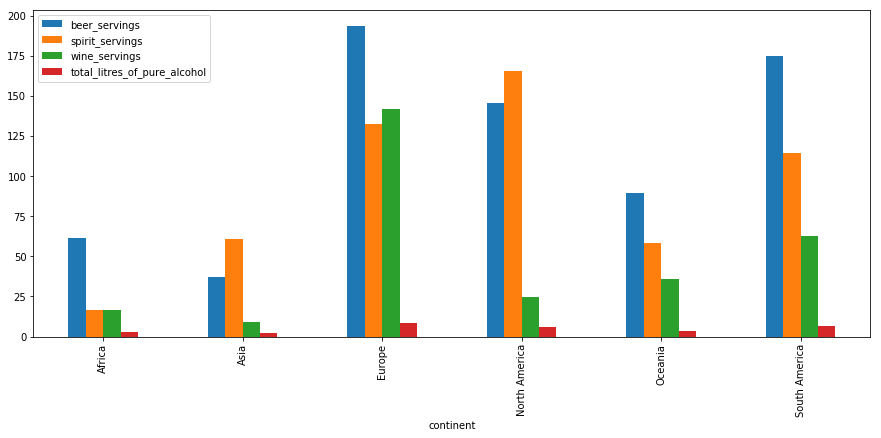

In [39]:
drinks.groupby('continent').mean().plot(figsize = (15,6),kind = 'bar')